## Brownian bridge prototype

In [1]:
%matplotlib inline

In [2]:
import os, sys
sys.path.append(os.path.abspath('../../main/python'))
import numpy as np
import thalesians.tsa.numpyutils as npu
import thalesians.tsa.processes as proc
import thalesians.tsa.random as rnd
import thalesians.tsa.simulation as sim
import matplotlib.pyplot as plt

In [3]:
start_time = 0.
end_time = 10.
times = np.linspace(0., 10., 1000)
start_value = 10.
end_value = 15.

In [4]:
times_col = npu.to_ndim_2(times, ndim_1_to_col=True)

In [5]:
mean = start_value + (times_col - start_time) / (end_time - start_time) * (end_value - start_value)

In [6]:
cov = np.array([[(end_time - max(times[i], times[j])) * (min(times[i], times[j]) - start_time) / (end_time - start_time) for j in range(len(times))] for i in range(len(times))])

In [7]:
values = rnd.multivariate_normal(mean, cov)

In [8]:
all_times = np.concatenate(([start_time], times, [end_time]))

In [9]:
all_values = np.concatenate(([start_value], values, [end_value]))

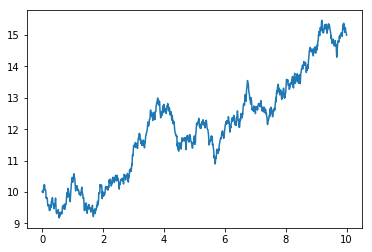

In [10]:
plt.plot(all_times, all_values)

## Brownian bridge process

In [11]:
X = proc.BrownianBridge(10., 15., 0., 10.)

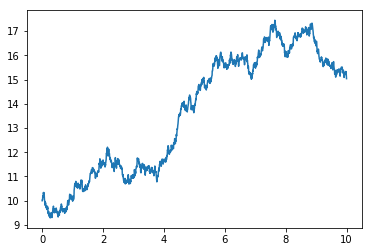

In [12]:
rnd.random_state(np.random.RandomState(seed=42), force=True);
ts = []; xs = []
for t, x in sim.EulerMaruyama(process=X, initial_value=10., times=sim.xtimes(0., 10., .005)):
    ts.append(t); xs.append(x.flatten())
plt.plot(ts, xs);

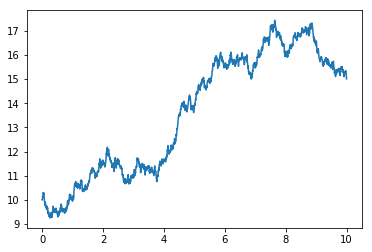

In [13]:
rnd.random_state(np.random.RandomState(seed=42), force=True);
x = [10.]
ts = [0.]; xs = [x]
for t, v in zip(sim.xtimes(0., 10., .005), rnd.multivatiate_normals(ndim=1)):
    x = X.propagate(t, v, ts[-1], x)
    ts.append(t); xs.append(x.flatten())
plt.plot(ts, xs);